<a href="https://colab.research.google.com/github/dsdayat/HR-Employee-Attrition/blob/main/First_Portofolio_HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals :
- Predict attrition of your valuable employees
- Define The Employe Categories who in charge in Attrition 
- Define the dominated Categories in which has strong correlation with Attrition

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfori = pd.read_csv('/content/HR Employee Attrition.csv')

In [4]:
df=dfori.copy()

In [5]:
df.shape

(1470, 35)

In [6]:
pd.set_option('display.max_columns', None)#to see full dataframe (non truncated)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


## Data Pre-Processing 



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#1. Data Type Correction

df['Attrition']=df['Attrition'].astype('category')
df['BusinessTravel']=df['BusinessTravel'].astype('category')
df['Department']=df['Department'].astype('category')
df['EducationField']=df['EducationField'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')
df['JobRole']=df['JobRole'].astype('category')
df['Over18']=df['Over18'].astype('category')
df['OverTime']=df['OverTime'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [9]:
df.columns.unique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#grouping categorical ad numerical
categoricals = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole','Over18', 'OverTime' ]

numericals =   ['Age', 'DailyRate','DistanceFromHome', 'Education' , 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel',
              'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours',
              'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


In [11]:
#check discrete data with unique categorical data
for i in categoricals:
  print(i,df[i].unique())


Attrition ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
BusinessTravel ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department ['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']
EducationField ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                         'Technical Degree']
Gender ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
MaritalStatus ['Single', 'Married', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
JobRole ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
Categories (9, object): 

*- There is discrete data ['Overtime'] only has 1 unique*
- Attrition will be the Target, tranformation yes=1 , No=0 necessary if applied on model

In [12]:
#2. Removing data which has discrete variabe
df.drop(['Over18'], axis = 1, inplace = True) #drop Over18

In [13]:
#Re-Check
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [14]:
#3.a Missing Value Percentage
df.isna().sum() * 100 / len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

*There is no missing value*

In [15]:
#3.b Duplicated Data Check
df.duplicated().sum()

0

*There is no duplicated data*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: tig

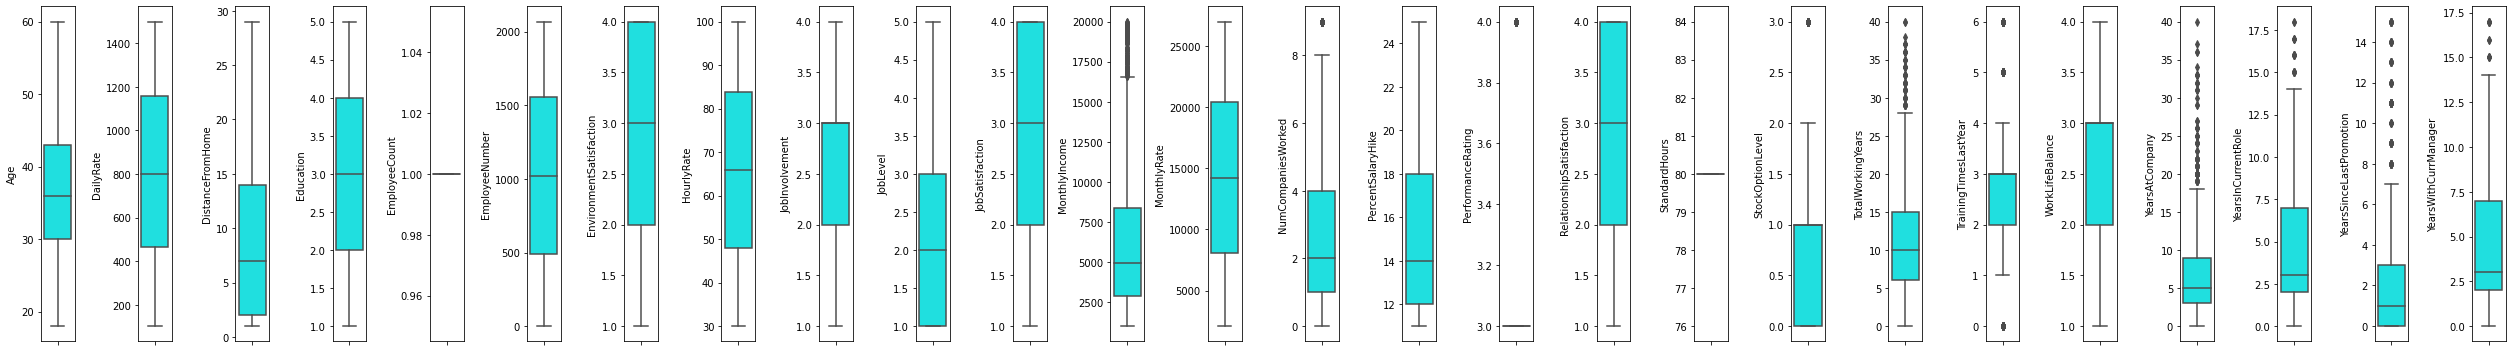

In [16]:
#3.c Noise or Outliers with Univariate Analysis
fig, axes = plt.subplots(4,4, figsize=(35,5))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

*There are many outliers but the value still reasonable*
- The Performance rating has dicrete unique

# Data Understanding
- Statistical Summary and KDE Plot Distribution Analysis Numerical 
- Statistical Summary and Bivariate Analysis for Categorical

In [17]:
df[['TotalWorkingYears']]

,TotalWorkingYears
0,8
1,10
2,7
3,8
4,6
...,...
1465,17
1466,9
1467,6
1468,17


# Statistical Summary for Numerical

In [18]:
df[numericals].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*Observation Statistical Summary for Numericals*
1. Overall the value of minimum dan maximum  each column is reasonable
2. discrete value are contain in feature ['EmployeeCount', 'EnvironmentSatisfaction', 'StandardHours',	'StockOptionLevel','StockOptionLevel','StandardHours'] we can ignore it or drop it
3. [DistanceFromHome],[MonthlyIncome][YearsAtCompany], mean > median, have skewed distribution
4. EmployeeNumber just a label , we can drop it and don't forget to readjust cateogorical or numerical filtering or just create new df that filtering except this feature
5. Even 'PerformanceRating' is discrete, the data still necessary for analysis

# KDE Plot Distribution Analysis for Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1

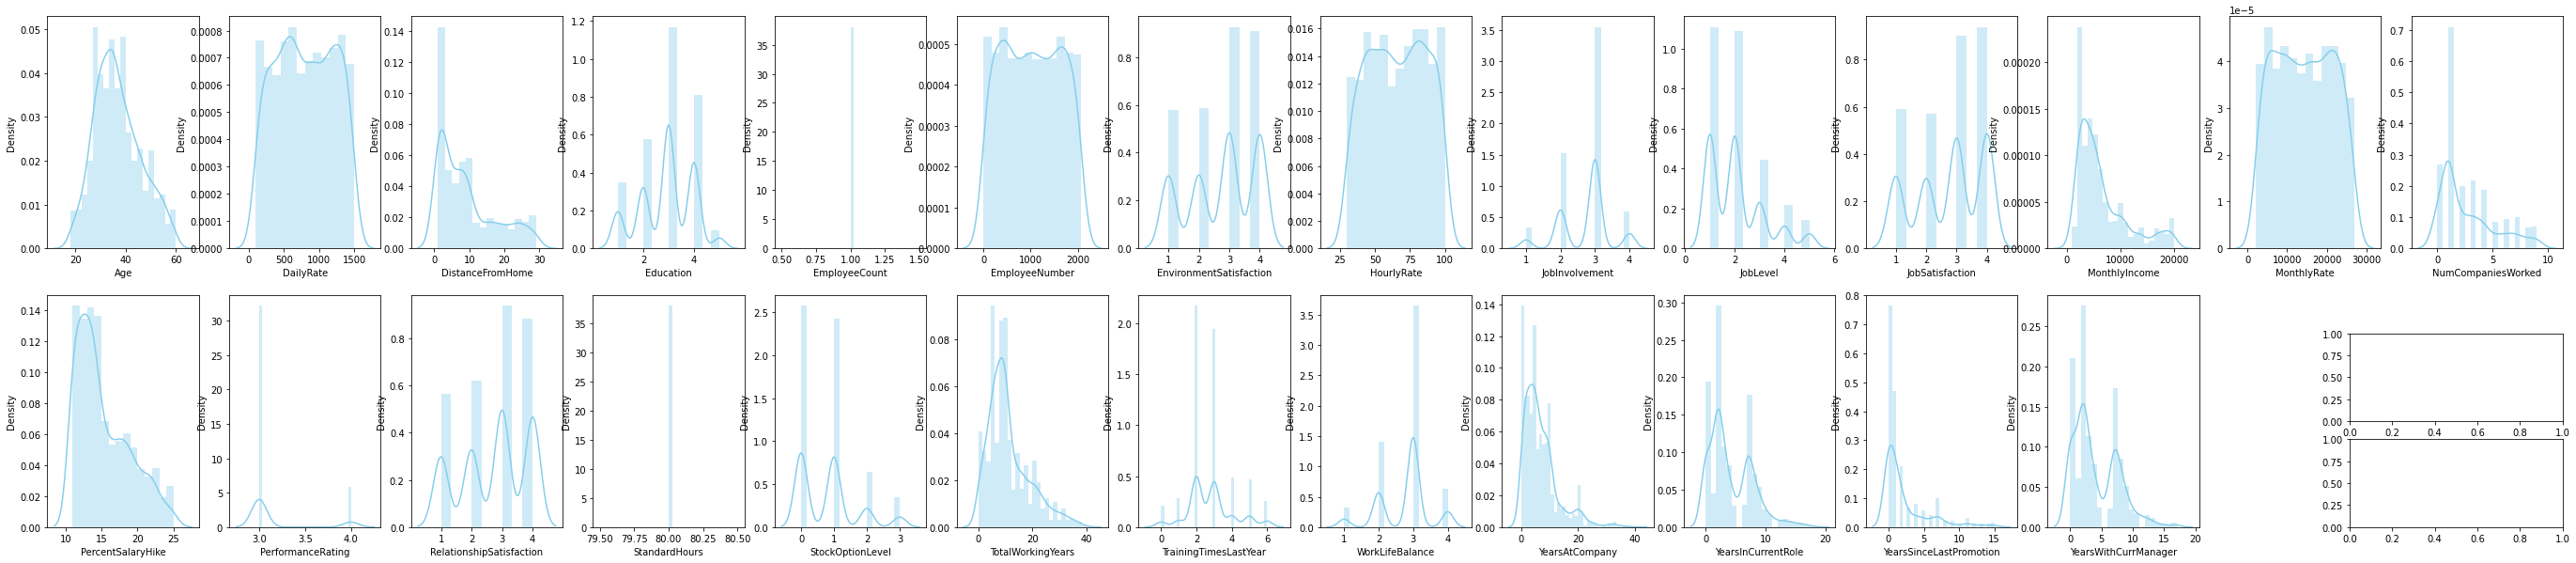

In [19]:
# adjust the figure size for better readability
fig, axes = plt.subplots(5,10, figsize=(48,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

*Observations for Distribution Analysis on numericals*
- The Symetric Feature is only Age
- Discrete Feature that we can ignore the symetric are ['Performance rating','EmployeeCount']
- positively skewed (log transformation is necessary if implemented on modelling) are ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
- There are so many Multi modal distribution such as ['DailyRate','Education', 'EmployeeNumber', 'EnvirontmentSatifaction','  


In [20]:
df.drop(['EmployeeNumber','EmployeeCount', 'EnvironmentSatisfaction', 'StandardHours','StockOptionLevel','StandardHours'], axis = 1, inplace = True) #drop EmployeeNumber 

In [21]:
#Re-adjust grouping categorical ad numerical
categoricals = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole', 'OverTime' ]

numericals =   ['Age', 'DailyRate','DistanceFromHome', 'Education' ,'HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 
              'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction',
              'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


# Statistical Summary on Categoricals

In [22]:
df[categoricals].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,MaritalStatus,JobRole,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,3,9,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Married,Sales Executive,No
freq,1233,1043,961,606,882,673,326,1054


In [23]:
(1470-1233)/1470*100

16.122448979591837

*Observation Statistical Summary for Categoricals*
- 1233 0f 1470 Employee not include in Attrition, 
- The percentage of attrition is 16.12% 
- The Categories who dominated in no Attrition are who Travel rarely in Research and Development department, has education field Life Science, *Married Men*, Has job role sales, and No Overtime

In [24]:
#detail dari categorical yang columnya banyak
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Attrition column
No     1233
Yes     237
Name: Attrition, dtype: int64 

Value counts of BusinessTravel column
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Value counts of Department column
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Value counts of EducationField column
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Value counts of Gender column
Male      882
Female    588
Name: Gender, dtype: int64 

Value counts of MaritalStatus column
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Value counts of JobRole column
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare 

# Bivariate Analysis on Categoricals

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


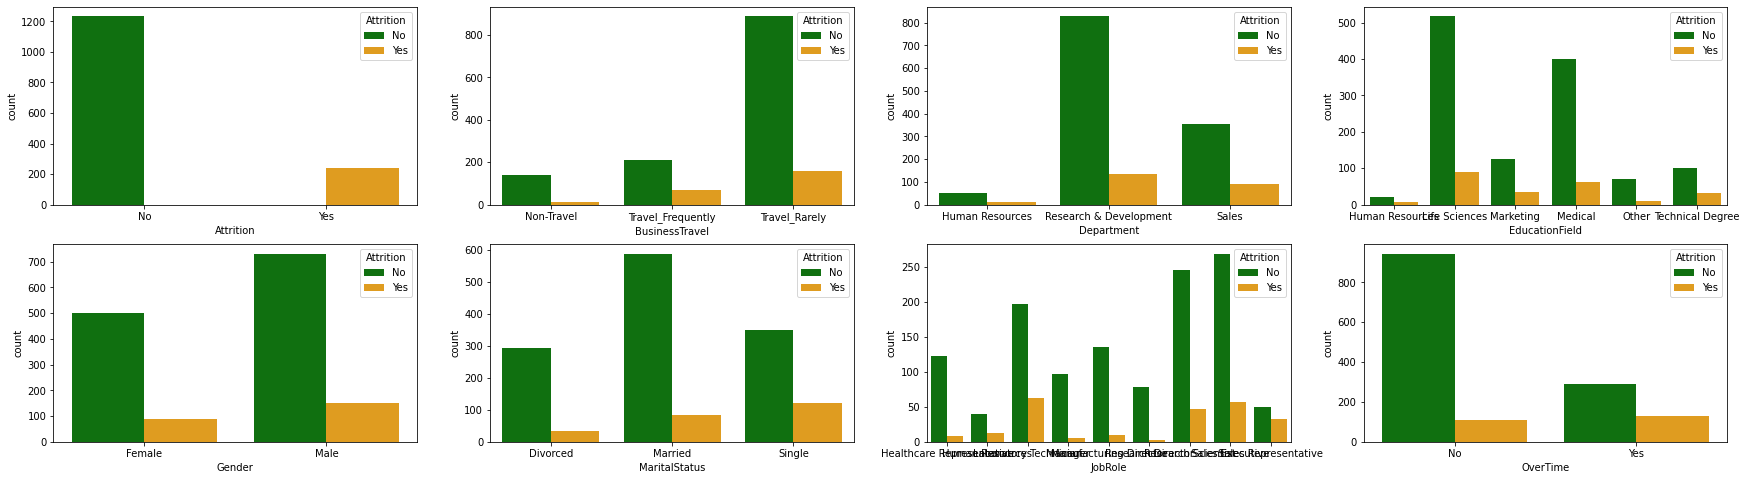

In [25]:
fig, axes =plt.subplots(2,4, figsize=(30,8))
for cat, ax in zip(categoricals, axes.flatten()):
    sns.countplot(cat, data=df, hue='Attrition',ax=ax, palette=['green','orange'])

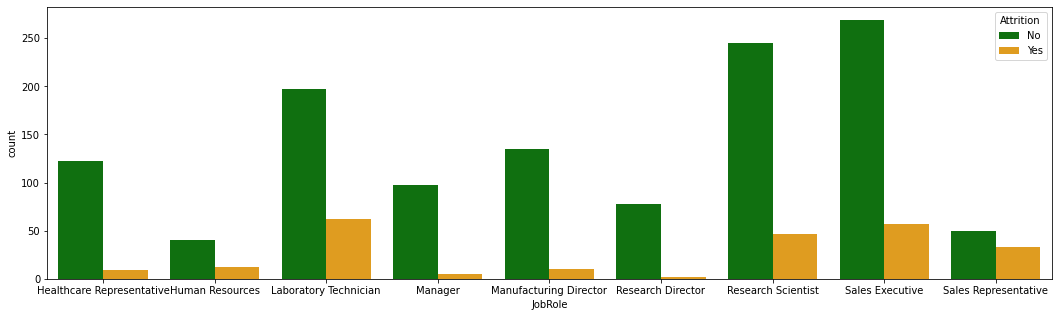

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['JobRole'], hue=df['Attrition'], data=df, palette=['green','orange'])

*Observation on Categorical Plot (Bivariate Analysis)*
- The Highest of the number of Employee is dominated by worker who travel rarely, work as Sales Executive, Research Scientist and laboratory Technician, has educational background life science and medical, Married Man, and No overtime
- In Other hand, The Attrition is dominated by employee who Travel-rarely, work in Research and Development, have life science education background, *Single Men*, has Job Role LaboratoryTechnician, Research Scientist, and Sales Executive, always OverTime.


Observation from Categorical

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

# Multivariate Analysis

In [29]:
#Tranfrom the target
dummy = pd.DataFrame()
### Create Dictionary
Attrition_dict = {
    'Yes':1,
    'No':0,
}

%time df['Attrition'] = df['Attrition'].map(Attrition_dict)#%time hanya untuk melihat berapa cepat processing

CPU times: user 5.29 ms, sys: 12 µs, total: 5.3 ms
Wall time: 7.11 ms


In [30]:
#Tranfrom over time
dummy = pd.DataFrame()
### Create Dictionary
OT_dict = {
    'Yes':1,
    'No':0,
}

%time df['OverTime'] = df['OverTime'].map(OT_dict)#%time hanya untuk melihat berapa cepat processing

CPU times: user 2.01 ms, sys: 3 µs, total: 2.01 ms
Wall time: 1.89 ms


In [31]:
df['Attrition']=df['Attrition'].astype('int64')
df['OverTime']=df['OverTime'].astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64 

In [33]:
#onehot encoding 
onehot_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender','MaritalStatus','JobRole']
df = pd.get_dummies(df, columns = onehot_columns)

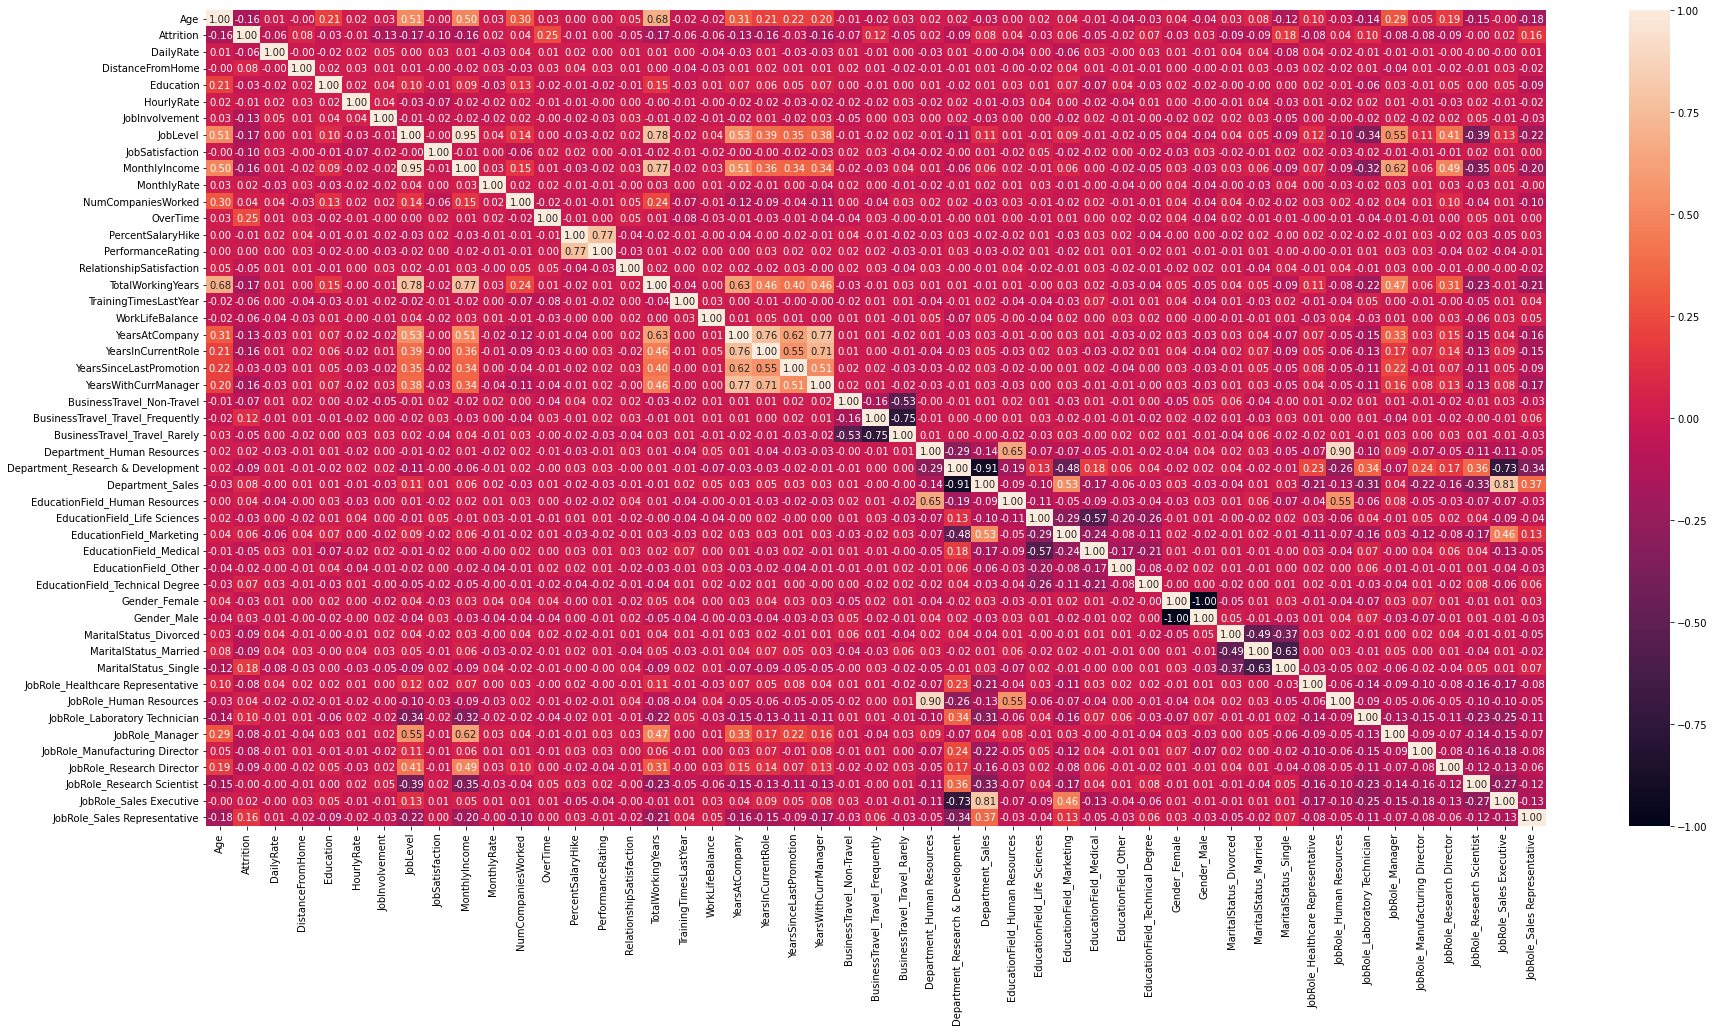

In [34]:
# correlation heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

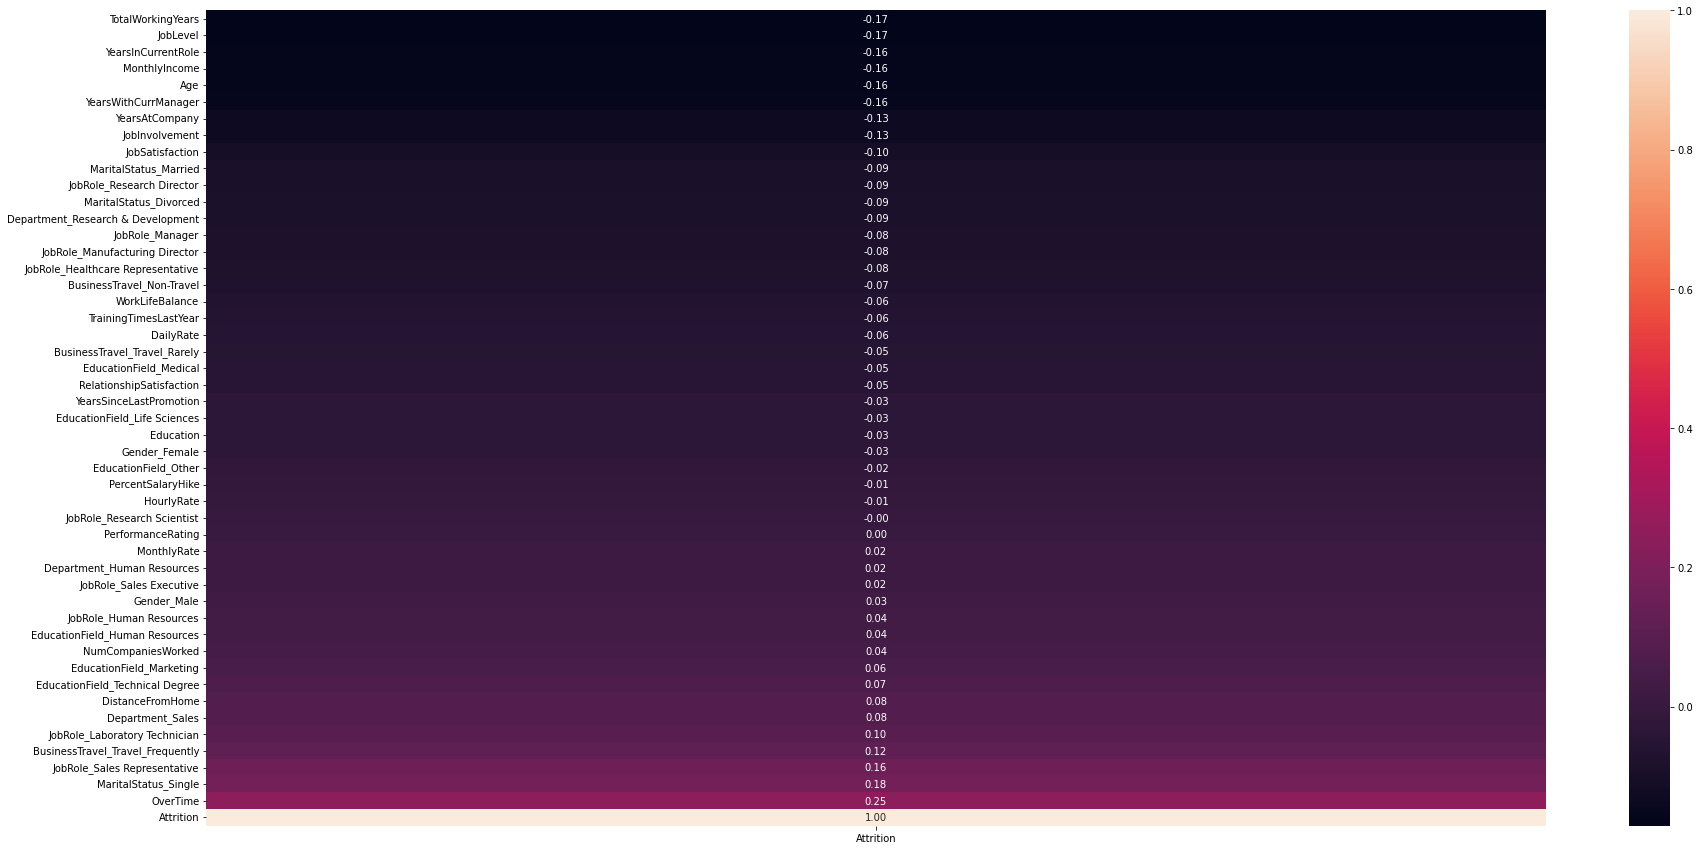

In [35]:
# correlation heatmap Ke Target Attrition dan kita sort
plt.figure(figsize=(30,15))
sns.heatmap(df.corr()[['Attrition']].sort_values('Attrition'), annot=True, fmt='.2f')

*The Feature which has the strongest correlation with the target ['Attrition']:*

-. Negative but strongest correlation are :
['TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager']

-. Positive but Strongest Correlation are:
['OverTime','MaritalStatus_Single',JobRole_Sales Representatif']

In [36]:
#Create new dataframe that has strongest correlation (Feature selection from heatmap)
sf = ['Attrition','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','OverTime','MaritalStatus_Single','JobRole_Sales Representative']

In [37]:
#head of selection feature
df[sf].head()

,Attrition,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,OverTime,MaritalStatus_Single,JobRole_Sales Representative
0,1,8,2,4,5993,41,5,1,1,0
1,0,10,2,7,5130,49,7,0,0,0
2,1,7,1,0,2090,37,0,1,1,0
3,0,8,1,7,2909,33,0,1,0,0
4,0,6,1,2,3468,27,2,0,0,0


In [38]:
df[sf].describe()

,Attrition,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,OverTime,MaritalStatus_Single,JobRole_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,11.279592,2.063946,4.229252,6502.931293,36.923810,4.123129,0.282993,0.319728,0.056463
std,0.367863,7.780782,1.106940,3.623137,4707.956783,9.135373,3.568136,0.450606,0.466530,0.230891
min,0.000000,0.000000,1.000000,0.000000,1009.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,1.000000,2.000000,2911.000000,30.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,10.000000,2.000000,3.000000,4919.000000,36.000000,3.000000,0.000000,0.000000,0.000000
75%,0.000000,15.000000,3.000000,7.000000,8379.000000,43.000000,7.000000,1.000000,1.000000,0.000000
max,1.000000,40.000000,5.000000,18.000000,19999.000000,60.000000,17.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

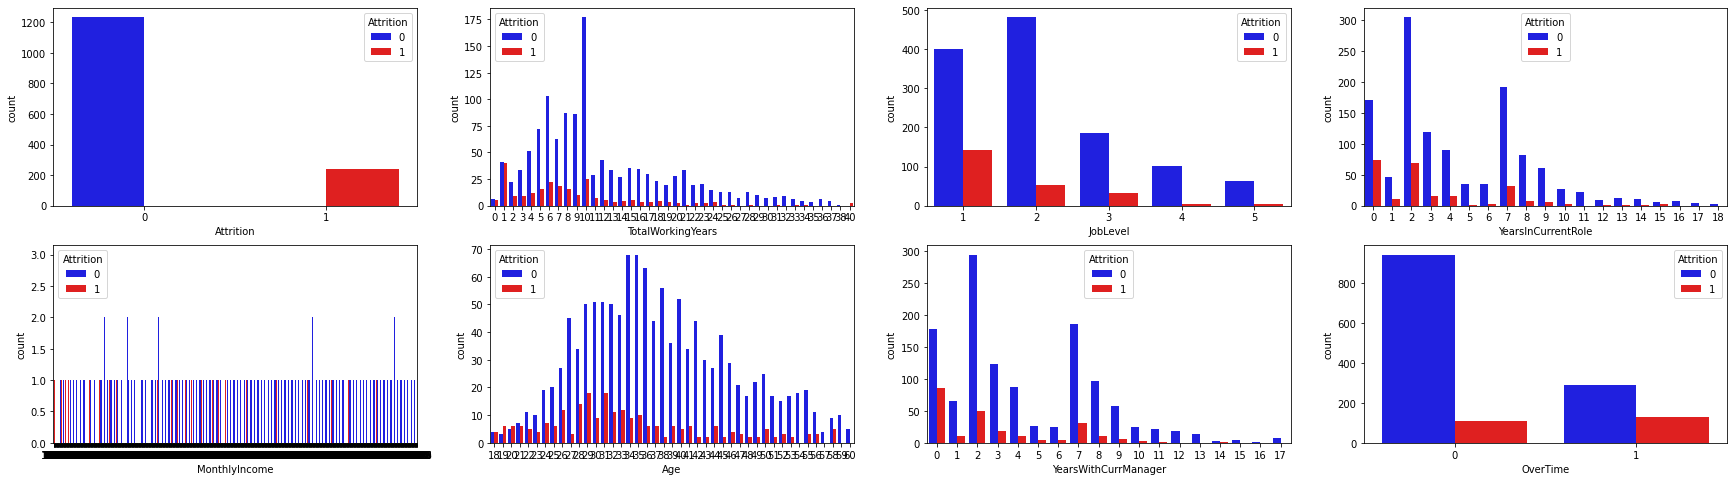

In [39]:
fig, axes =plt.subplots(2,4, figsize=(30,8))
for cat, ax in zip(sf, axes.flatten()):
    sns.countplot(cat, data=df, hue='Attrition',ax=ax, palette=['blue','red'])

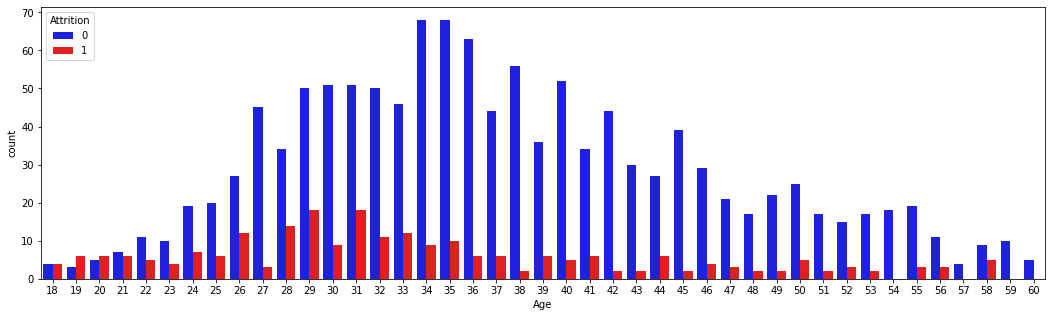

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Age'], hue=df['Attrition'], data=df, palette=['blue','red'])

In [41]:
# Since to hard to interpret The Monthly Income , Categorize methode based on level income necessary
def lm(x):
    if x <= 2911:
        return '1'
    elif x > 2911 and x <=4919 :
        return '2'
    elif x > 4919 and x <=8379 :
        return '3'
    elif x > 8379:
        return '4'
    
df['LevelIncome'] = df['MonthlyIncome'].apply(lm)

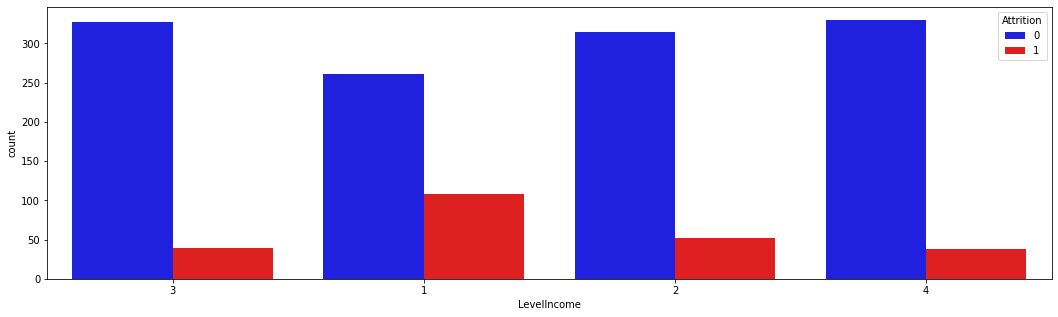

In [42]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['LevelIncome'], hue=df['Attrition'], data=df, palette=['blue','red'])

# EDA Conclussion

*   The Attrition Rate is 16.2%
*   The Attrition will be  in charge to employee who is Single, Years in Current Role Below or equal 2nd years, job level 1. Dominated by Total Working Years 1st year, Always OverTime,  dominated by age 29th yo and 31th yo, Job Role is Sales Representative 
*   Since Monthly Income is too hard to interpret, the new feature Level Income has added. Based on The data LevelIncome 1 is dominated in Attrition which means The employee which has Monthly Incume under or equal to 2911 will dominated in Attrition. 



# Modelling Using Supervised ML=Random Forest 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
#SplitData
# split train test
from sklearn.model_selection import train_test_split

feature = df[sf].drop(columns='Attrition')
target = df[sf][['Attrition']]

# First splitting: pretrain and test
feature_Attrition_pretrain, feature_Attrition_test, target_Attrition_pretrain, target_Attrition_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_Attrition_train, feature_Attrition_validation, target_Attrition_train, target_Attrition_validation = train_test_split(feature_Attrition_pretrain, target_Attrition_pretrain, test_size=0.20, random_state=42)

In [45]:
#training model data testnya pake validasi, kalo udah ok bisa langsung pake test
x_train_data = feature_Attrition_train
y_train_data = target_Attrition_train

x_valid_data = feature_Attrition_validation
y_valid_data = target_Attrition_validation

x_test_data = feature_Attrition_test
y_test_data = target_Attrition_test

In [46]:
def evaluate(model, x_test = x_valid_data, y_test = y_valid_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

**Random Forest Base Model**

In [47]:
#Random Forest Base Model
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.8305084745762712
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       191
           1       0.61      0.31      0.41        45

    accuracy                           0.83       236
   macro avg       0.73      0.63      0.66       236
weighted avg       0.81      0.83      0.81       236

------
Assuming 1 as positive, we get:

True Positive: 14
True Negative: 182
False Positive: 9
False Negative: 31

Precision: 0.6086956521739131
Recall: 0.3111111111111111
F1-Score: 0.411764705882353


*Accuracy is good (0.83), Precission is OK, recall is poor, and the F1-Score is poor*. 

Conclussion :
**Not Good Model**

With Over Coef = 0.2 and Under Coef=0.4
- remark: 
- F1>0.9= very good
- 0.8>F1>0.9= Good
- 0.5>F1>0.8 = OK
- F1<0.5= Not Good
- False Negetive  higher than false positive

**Random Forest Undersampling Model** (Use if Overfitting)

In [48]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Attrition']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['Attrition']))

Counter({0: 787, 1: 153})
Counter({0: 153, 1: 153})


In [49]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_valid_data, y_valid_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.7288135593220338
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       191
           1       0.39      0.78      0.52        45

    accuracy                           0.73       236
   macro avg       0.66      0.75      0.67       236
weighted avg       0.83      0.73      0.76       236

------
Assuming 1 as positive, we get:

True Positive: 35
True Negative: 137
False Positive: 54
False Negative: 10

Precision: 0.39325842696629215
Recall: 0.7777777777777778
F1-Score: 0.5223880597014926


*Accuracy is good (0.70), Precission is poor, recall is OK, and the F1-Score is poor*. 

Conclussion :
**Not Good Model**

- remark: 
- F1>0.9= very good
- 0.8>F1>0.9= Good
- 0.5>F1>0.8 = OK
- F1<0.5= Not Good
- False Negetive less than false positive

**Random Forest with Oversammpling Model** (use if underfitting)

In [50]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Attrition']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['Attrition']))

Counter({0: 787, 1: 153})
Counter({0: 787, 1: 787})


In [51]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_valid_data, y_valid_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.6991525423728814
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       191
           1       0.29      0.40      0.34        45

    accuracy                           0.70       236
   macro avg       0.57      0.58      0.57       236
weighted avg       0.74      0.70      0.72       236

------
Assuming 1 as positive, we get:

True Positive: 18
True Negative: 147
False Positive: 44
False Negative: 27

Precision: 0.2903225806451613
Recall: 0.4
F1-Score: 0.3364485981308411


*Accuracy is good (0.73), Precission is poor, recall is poor, and the F1-Score is poor*. 

Conclussion :
**Not Good Model**


- remark: 
- F1>0.9= very good
- 0.8>F1>0.9= Good
- 0.5>F1>0.8 = OK
- F1<0.5= Not Good
- False Negetive less than false positive

**Random Forest Classifier Model Combining  (Oversampling and Undersampling)**

In [85]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_valid_data, y_valid_data)

Accuracy: 0.8177966101694916
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       191
           1       0.52      0.73      0.61        45

    accuracy                           0.82       236
   macro avg       0.72      0.79      0.74       236
weighted avg       0.85      0.82      0.83       236

------
Assuming 1 as positive, we get:

True Positive: 33
True Negative: 160
False Positive: 31
False Negative: 12

Precision: 0.515625
Recall: 0.7333333333333333
F1-Score: 0.6055045871559632


*Accuracy is good (0.85), Precission is OK, recall is OK, and the F1-Score is OK*. 

Conclussion :
**The Best Model**

With Over Coef = 0.2 and Under Coef=0.7
- remark: 
- F1>0.9= very good
- 0.8>F1>0.9= Good
- 0.5>F1>0.8 = OK
- F1<0.5= Not Good
- False Negetive a few higher than false positive

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_valid_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_valid_data, y_pred))
            result['prec'].append(precision_score(y_valid_data, y_pred))
            result['recall'].append(recall_score(y_valid_data, y_pred))
            result['f1'].append(f1_score(y_valid_data, y_pred))
        except:
            pass

100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


In [54]:
df_result = pd.DataFrame(result)
df_result

,over_coef,under_coef,acc,prec,recall,f1
0,0.2,0.2,0.830508,0.600000,0.333333,0.428571
1,0.2,0.3,0.847458,0.666667,0.400000,0.500000
2,0.2,0.4,0.822034,0.538462,0.466667,0.500000
3,0.2,0.5,0.800847,0.480769,0.555556,0.515464
4,0.2,0.6,0.800847,0.480000,0.533333,0.505263
5,0.2,0.7,0.800847,0.485294,0.733333,0.584071
6,0.2,0.8,0.766949,0.432432,0.711111,0.537815
7,0.2,0.9,0.733051,0.400000,0.800000,0.533333
8,0.2,1.0,0.741525,0.404762,0.755556,0.527132
9,0.3,0.3,0.834746,0.615385,0.355556,0.450704


In [86]:
#cari koefisien over dan under yang terbaik terhadap F1 score
df_result.sort_values(['f1'], ascending=False)

,over_coef,under_coef,acc,prec,recall,f1
5,0.2,0.7,0.800847,0.485294,0.733333,0.584071
6,0.2,0.8,0.766949,0.432432,0.711111,0.537815
7,0.2,0.9,0.733051,0.400000,0.800000,0.533333
8,0.2,1.0,0.741525,0.404762,0.755556,0.527132
16,0.3,1.0,0.741525,0.404762,0.755556,0.527132
3,0.2,0.5,0.800847,0.480769,0.555556,0.515464
13,0.3,0.7,0.783898,0.450000,0.600000,0.514286
15,0.3,0.9,0.758475,0.416667,0.666667,0.512821
4,0.2,0.6,0.800847,0.480000,0.533333,0.505263
2,0.2,0.4,0.822034,0.538462,0.466667,0.500000


**The Best Model shown in Random Forest with Combination of oversampling and undersampling model based on:**

- *F1 score*  (The best Over Coef : 0.2 and Under Coef: 0.7)
- *Precision score*  over coef = 0.2, under coef = 0.3
- *Recall Score recall*, over coef = 0.2, under coef = 0.9
